In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Models with missing values 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Apply Label Encoding to categorical variables
label_encoder = LabelEncoder()
encoded_categorical = df[categorical_columns].apply(label_encoder.fit_transform)

# Concatenate encoded categorical variables with numerical variables
X = pd.concat([encoded_categorical, df[numerical_columns]], axis=1)
y = X['y']
X = X.drop('y', axis=1)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print results
print("Model\t\t\tAccuracy\tF1 Score")
print("-----------------------------------------")
for name, scores in results.items():
    print(f"{name.ljust(20)}{scores['Accuracy']:.4f}\t\t{scores['F1 Score']:.4f}")


C:\Users\mayur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model			Accuracy	F1 Score
-----------------------------------------
Logistic Regression 0.9102		0.9009
Decision Tree       0.8884		0.8889
Random Forest       0.9160		0.9124
SVM                 0.8945		0.8708
Naive Bayes         0.8506		0.8639
XGBoost             0.9142		0.9115


In [5]:
# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate over each categorical column and get unique values
for column in categorical_columns:
    unique_values = df[column].unique()
    #print(f"Unique values of column '{column}': {unique_values}")
    value_counts = df[column].value_counts()
    print(f"Value counts of column '{column}':\n{value_counts}")


Value counts of column 'job':
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Value counts of column 'marital':
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Value counts of column 'education':
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Value counts of column 'default':
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
Value counts of column 'housing':
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
Value counts

In [6]:
## Removing unknown value from each categorical column
# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('y')

# Filter out records with 'unknown' values in any categorical column
filtered_df = df[~df[categorical_columns].isin(['unknown']).any(axis=1)]


In [7]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [8]:
filtered_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
# Basic Models without missing values 

# Separate categorical and numerical columns
categorical_columns = filtered_df.select_dtypes(include=['object']).columns
numerical_columns = filtered_df.select_dtypes(exclude=['object']).columns

# Apply Label Encoding to categorical variables
label_encoder = LabelEncoder()
encoded_categorical = filtered_df[categorical_columns].apply(label_encoder.fit_transform)

# Concatenate encoded categorical variables with numerical variables
X = pd.concat([encoded_categorical, filtered_df[numerical_columns]], axis=1)
y = X['y']
X = X.drop('y', axis=1)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print results
print("Model\t\t\tAccuracy\tF1 Score")
print("-----------------------------------------")
for name, scores in results.items():
    print(f"{name.ljust(20)}{scores['Accuracy']:.4f}\t\t{scores['F1 Score']:.4f}")

C:\Users\mayur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model			Accuracy	F1 Score
-----------------------------------------
Logistic Regression 0.8955		0.8842
Decision Tree       0.8765		0.8762
Random Forest       0.8990		0.8946
SVM                 0.8808		0.8530
Naive Bayes         0.8283		0.8426
XGBoost             0.8973		0.8937


In [10]:
## Replace unknown values with mode for each categorical variable
for column in categorical_columns:
    mode_value = df[column].mode()[0]  # Calculate mode
    df[column].replace('unknown', mode_value, inplace=True)  # Replace 'unknown' with mode value

In [11]:
# Basic Models with replacing missing values by mode

# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Apply Label Encoding to categorical variables
label_encoder = LabelEncoder()
encoded_categorical = df[categorical_columns].apply(label_encoder.fit_transform)

# Concatenate encoded categorical variables with numerical variables
X = pd.concat([encoded_categorical, df[numerical_columns]], axis=1)
y = X['y']
X = X.drop('y', axis=1)

final_data = pd.concat([X,y],axis=1)
final_data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print results
print("Model\t\t\tAccuracy\tF1 Score")
print("-----------------------------------------")
for name, scores in results.items():
    print(f"{name.ljust(20)}{scores['Accuracy']:.4f}\t\t{scores['F1 Score']:.4f}")

Model			Accuracy	F1 Score
-----------------------------------------
Logistic Regression 0.9109		0.9012
Decision Tree       0.8860		0.8869
Random Forest       0.9111		0.9072
SVM                 0.8945		0.8708
Naive Bayes         0.8417		0.8577
XGBoost             0.9136		0.9104


In [12]:
# Check whether dataset is balanced or not 
unique_values = df['y'].unique()
print(f"Unique values of column '{'y'}': {unique_values}")
value_counts = df['y'].value_counts()
print(f"Value counts of column '{'y'}':\n{value_counts}")

Unique values of column 'y': ['no' 'yes']
Value counts of column 'y':
no     36548
yes     4640
Name: y, dtype: int64


In [14]:
# After balancing dataset 
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print results
print("Model\t\t\tAccuracy\tF1 Score")
print("-----------------------------------------")
for name, scores in results.items():
    print(f"{name.ljust(20)}{scores['Accuracy']:.4f}\t\t{scores['F1 Score']:.4f}")


C:\Users\mayur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model			Accuracy	F1 Score
-----------------------------------------
Logistic Regression 0.8636		0.8780
Decision Tree       0.8801		0.8847
Random Forest       0.9056		0.9088
SVM                 0.8401		0.8630
Naive Bayes         0.7680		0.8049
XGBoost             0.9033		0.9072


In [15]:
final_data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,1,0,0,0,0,1,6,1,1,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,7,1,3,0,0,0,1,6,1,1,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,7,1,3,0,1,0,1,6,1,1,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,1,1,0,0,0,1,6,1,1,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,7,1,3,0,0,1,1,6,1,1,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,1,0,0,7,0,1,...,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,1,5,0,0,0,0,7,0,1,...,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,5,1,6,0,1,0,0,7,0,1,...,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,9,1,5,0,0,0,0,7,0,1,...,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


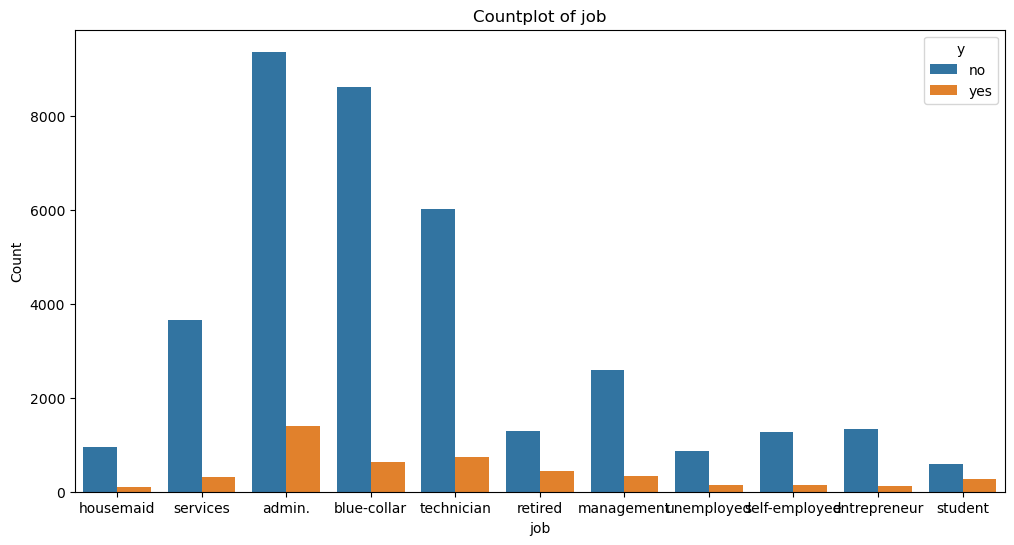

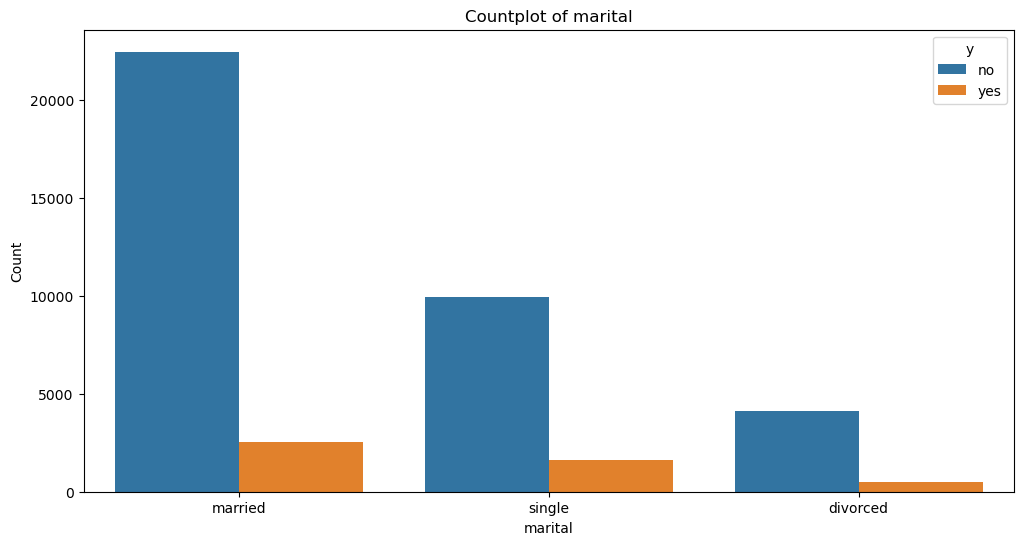

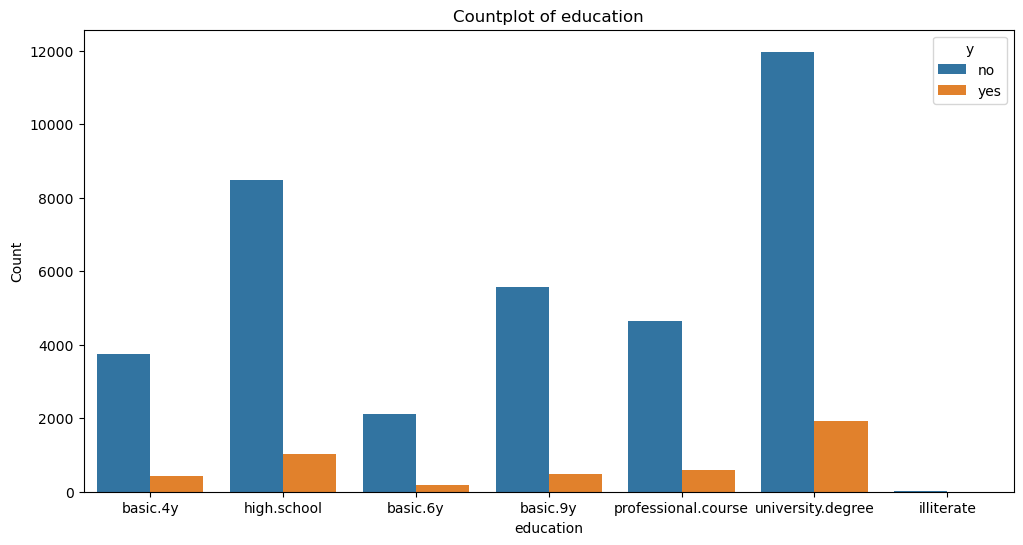

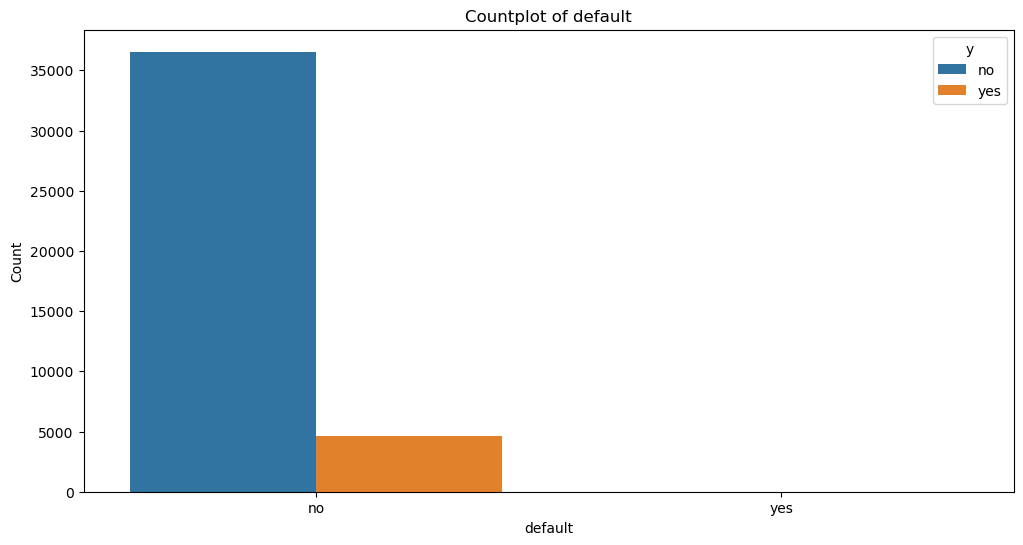

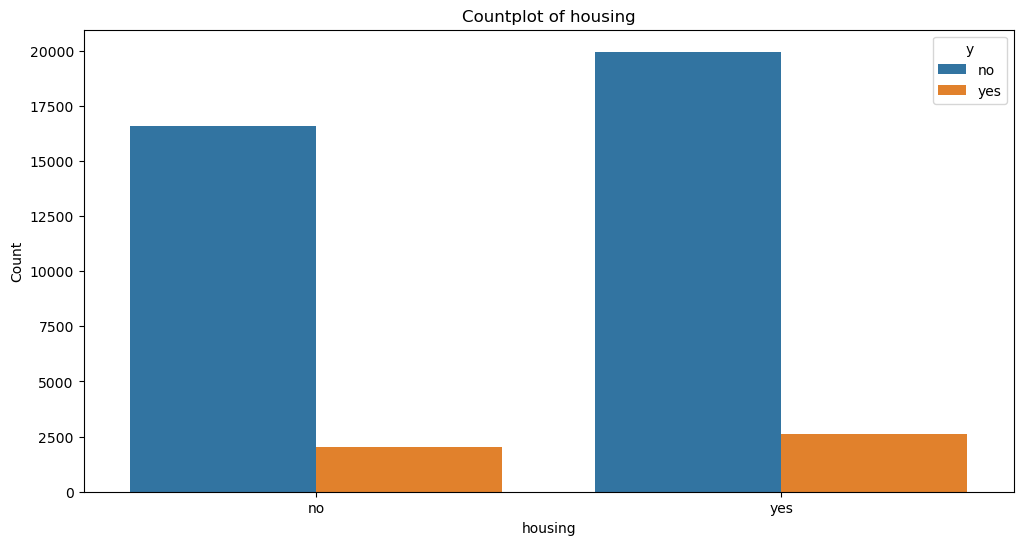

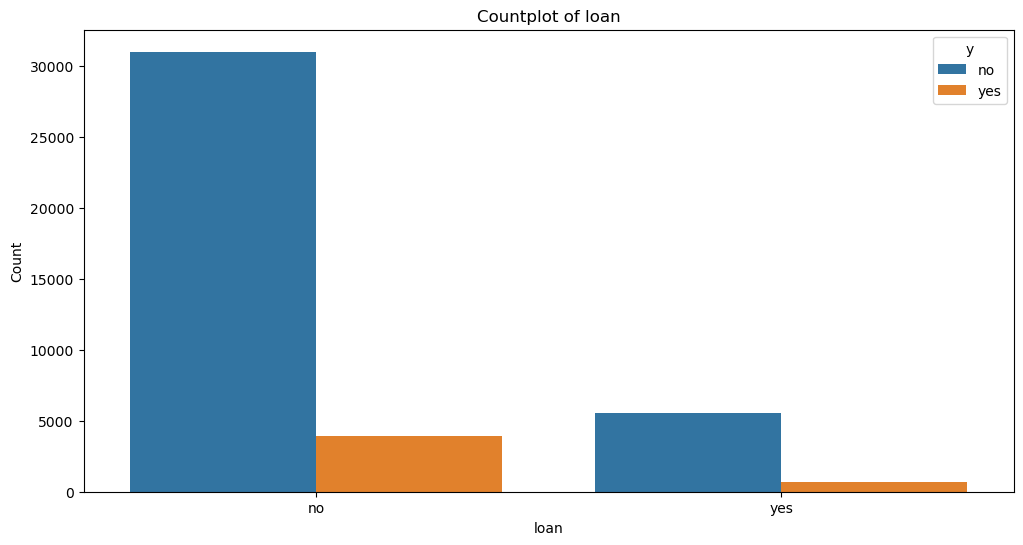

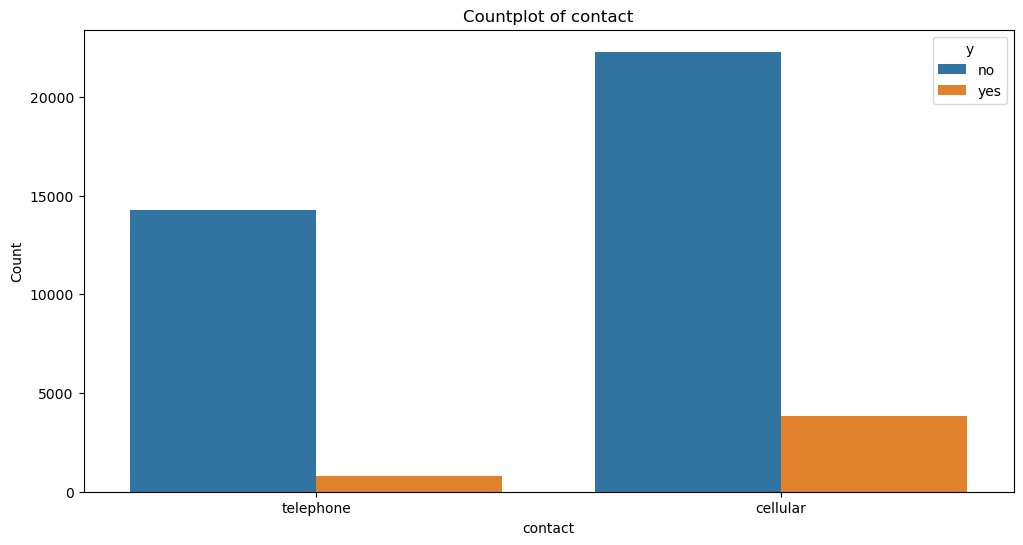

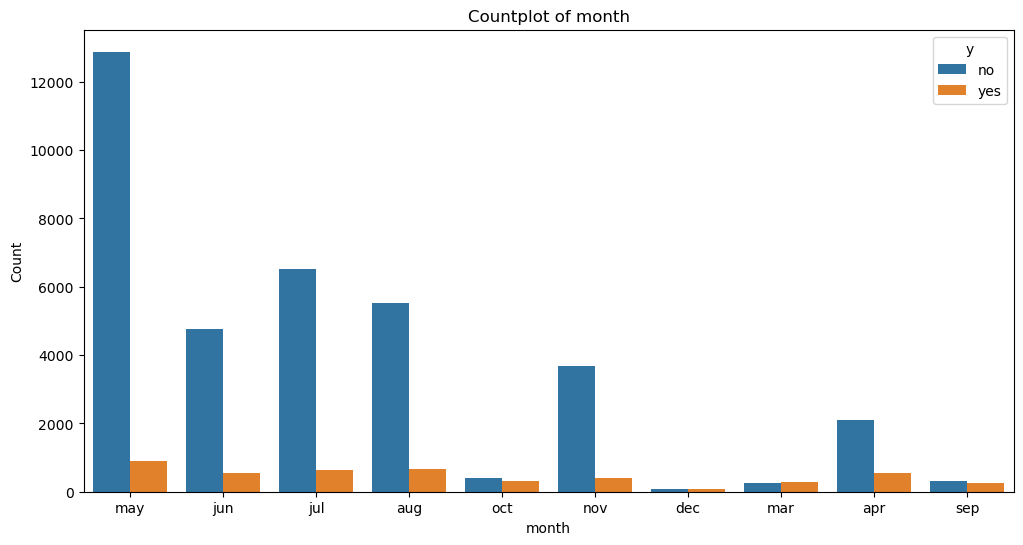

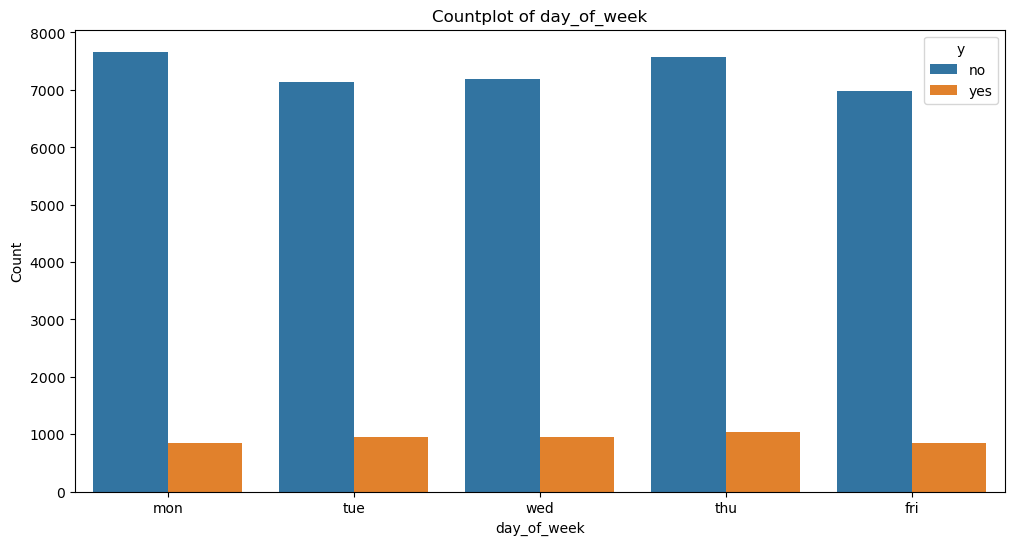

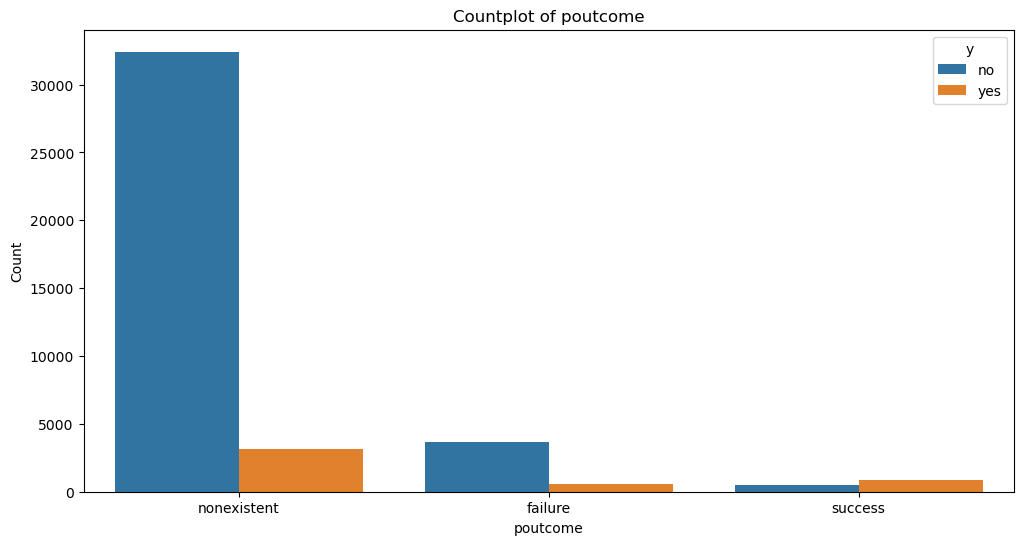

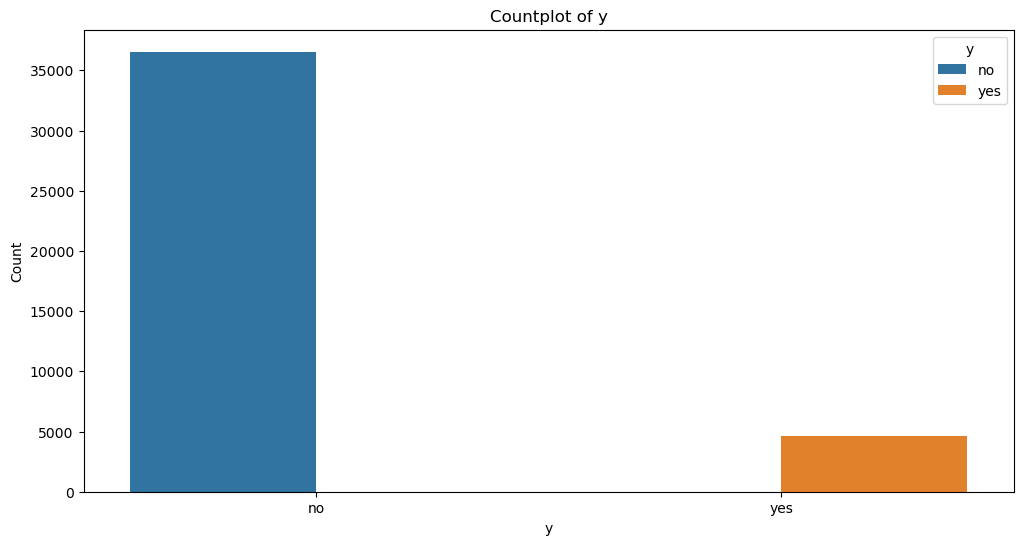

In [16]:
for column in categorical_columns:
    plt.figure(figsize=(12, 6))  # Adjust size as needed
    sns.countplot(x=column,hue='y', data=df)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [17]:
final_data.corr()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,1.000000,0.025462,0.131869,0.013698,0.007516,-0.011832,-0.031929,-0.033206,-0.004111,0.006660,...,-0.004790,-0.007736,-0.025673,0.022154,-0.012738,-0.022366,0.044282,-0.012672,-0.021848,0.025482
marital,0.025462,1.000000,0.111405,-0.002388,0.011312,0.006483,-0.054610,-0.008824,0.002473,0.002463,...,0.009030,-0.008745,-0.037402,0.037703,-0.083709,-0.056822,-0.033639,-0.091604,-0.086099,0.045849
education,0.131869,0.111405,1.000000,0.002576,0.016465,0.009242,-0.110515,-0.084505,-0.016828,0.016786,...,-0.015823,0.000172,-0.045742,0.037680,-0.044648,-0.086668,0.078166,-0.036762,-0.040502,0.057268
default,0.013698,-0.002388,0.002576,1.000000,-0.003679,-0.003609,-0.006474,-0.004528,0.006079,-0.006196,...,-0.005101,-0.003803,0.001668,0.002766,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,0.007516,0.011312,0.016465,-0.003679,1.000000,0.036425,-0.077937,-0.017006,0.003348,-0.012591,...,-0.008334,-0.010959,-0.010131,0.021677,-0.059100,-0.077170,-0.032388,-0.058233,-0.045590,0.011085
loan,-0.011832,0.006483,0.009242,-0.003609,0.036425,1.000000,-0.013367,-0.007073,-0.009483,-0.000237,...,0.000121,0.005294,-0.000086,-0.002143,0.001193,-0.005944,-0.013673,-0.000487,0.004205,-0.004466
contact,-0.031929,-0.054610,-0.110515,-0.006474,-0.077937,-0.013367,1.000000,0.276565,-0.009575,0.118744,...,-0.026657,0.077368,0.117970,-0.212848,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.033206,-0.008824,-0.084505,-0.004528,-0.017006,-0.007073,0.276565,1.000000,0.027677,-0.065012,...,0.003690,-0.062059,-0.047891,0.103157,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.004111,0.002473,-0.016828,0.006079,0.003348,-0.009483,-0.009575,0.027677,1.000000,0.018732,...,0.021950,-0.038288,-0.009531,-0.004102,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967
poutcome,0.006660,0.002463,0.016786,-0.006196,-0.012591,-0.000237,0.118744,-0.065012,0.018732,1.000000,...,0.033360,0.032586,-0.475619,-0.313110,0.192972,0.211330,0.178289,0.184144,0.119689,0.129789


In [18]:
# statistical testing

from scipy.stats import chi2_contingency

for column in categorical_columns:
    # Example: Chi-square test for independence between categorical feature and target variable
    chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[column], df['y']))
    print(f'chi2, p_value of {column} are {chi2},{p_value}')


chi2, p_value of job are 960.2507491275793,6.808199923441661e-200
chi2, p_value of marital are 120.78428938616787,5.915954286692898e-27
chi2, p_value of education are 192.1935713810622,8.692046071480118e-39
chi2, p_value of default are 0.0,1.0
chi2, p_value of housing are 4.991011361817752,0.025479312776658963
chi2, p_value of loan are 0.782638585351278,0.37633537946635287
chi2, p_value of contact are 862.3183642075705,1.5259856523129964e-189
chi2, p_value of month are 3101.149351411678,0.0
chi2, p_value of day_of_week are 26.14493907587197,2.9584820052785324e-05
chi2, p_value of poutcome are 4230.5237978319765,0.0
chi2, p_value of y are 41177.99692695045,0.0


In [19]:
# Feature importance using random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

X = final_data
y = X['y']
X = X.drop('y', axis=1)

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model using all categorical variables
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

print(f'feature importance of all variables are {feature_importances}')

print('\n')

# Example: Calculating information gain for categorical features
info_gain = mutual_info_classif(X, y)

print(f'information gain of all variables are {info_gain}')


feature importance of all variables are [4.91728958e-02 2.38943107e-02 4.11557633e-02 1.57282499e-08
 1.89899365e-02 1.29733929e-02 1.02231601e-02 1.75668061e-02
 4.22250392e-02 2.94031266e-02 9.53469135e-02 3.25399684e-01
 4.39737453e-02 3.33095108e-02 1.28319575e-02 2.44261817e-02
 2.24720050e-02 2.60865753e-02 1.01976535e-01 6.85724449e-02]


information gain of all variables are [0.01122012 0.00414829 0.00409953 0.         0.0060042  0.0016166
 0.01365058 0.02933117 0.00103102 0.03543018 0.01474429 0.07655389
 0.0050069  0.03890033 0.01913828 0.0553419  0.0669289  0.06771608
 0.07355241 0.06634302]


In [20]:
# Set threshold for feature importance
threshold = 0.05  # Adjust the threshold as needed

# Select features with importance above the threshold
selected_features = X.columns[feature_importances > threshold]

# Now 'selected_features' contains the names of features with importance above the threshold
print("Selected features:")
print(selected_features)


Selected features:
Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')


In [21]:
# Set threshold for information gain
threshold = 0.04  # Adjust the threshold as needed

# Select features with information gain above the threshold
selected_features = X.columns[info_gain > threshold]

# Now 'selected_features' contains the names of features with importance above the threshold
print("Selected features:")
print(selected_features)


Selected features:
Index(['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')


In [22]:
#After keeping important features 

imp_features = ['age', 'duration', 'euribor3m', 'nr.employed', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
X = final_data[imp_features]
y = final_data['y']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print results
print("Model\t\t\tAccuracy\tF1 Score")
print("-----------------------------------------")
for name, scores in results.items():
    print(f"{name.ljust(20)}{scores['Accuracy']:.4f}\t\t{scores['F1 Score']:.4f}")

Model			Accuracy	F1 Score
-----------------------------------------
Logistic Regression 0.9054		0.8907
Decision Tree       0.8859		0.8858
Random Forest       0.9065		0.9038
SVM                 0.8881		0.8429
Naive Bayes         0.8695		0.8821
XGBoost             0.9094		0.9067


#### Hyper Parameter Tuning

In [26]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']}
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8}


### FINAL MODEL

In [30]:
# # Random forest Model 2: hyperparameter tuning
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 8)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(X_test)
# Evaluate model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[7105  428]
 [ 198  507]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.72      0.54      0.62       935

    accuracy                           0.92      8238
   macro avg       0.83      0.76      0.79      8238
weighted avg       0.92      0.92      0.92      8238

Accuracy: 0.9240106822044185
